In [26]:
import numpy as np
from logistic_regression import *
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../hw1/')
from gradient_descent import GradientDescent, quad, quadGrad
import scipy.io
import scipy.optimize
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

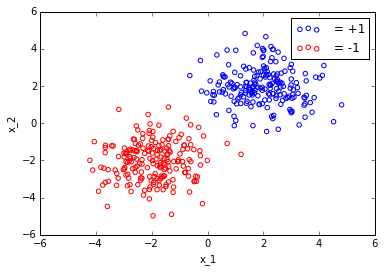

In [28]:
filename = "data_stdev1"
lr = LogisticRegression.fromFile(filename, type="train")
lr.plotData()

 
--- Minimization Summary --- 
x_min is = [-0.88248885  3.97829428  4.11363747]
f_min is = 0.607264842237
achieved tolerance = -9.99981798417e-05
numFunctionCalls = 4369
---------------------------- 
 
--- Classification Summary ---
w_full = [-0.88248885  3.97829428  4.11363747]
w_full normalized = [-0.15240802  0.68706134  0.71043544]
norm of w_full = 5.79030441142
lambda = 0
number of entries missclassified = 0
missclassification rate  = 0.0
------------------



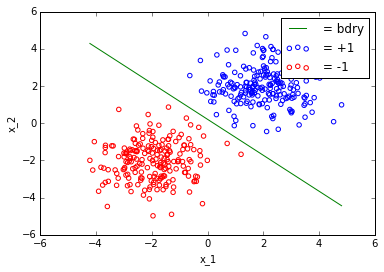

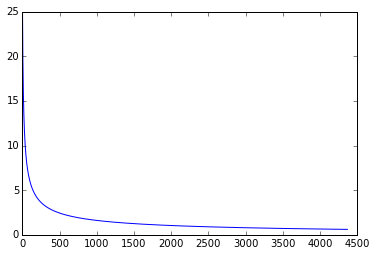

array([-0.88248885,  3.97829428,  4.11363747])

In [29]:
w_full = np.array([1,1,1])
lam = 0
lr.computeDecisionBoundary(w_full, lam, plot=True, printSummary=True, stepSize=0.001, plotIter=True)
# gd = lr.constructGradientDescentObject(lam)
# gd.stepSize = 0.02
# (w_star,_,_,_) = gd.computeMin(w_full, maxFunctionCalls=10000, storeIterValues=True, printSummary=True)
# print np.shape(w_star)
# gd.plotIterValues()
# print lr.NLL_Reg(w_star, lam)
# lr.plotData(w_full=w_star)


--------------------
data_nonsep

 
--- Minimization Summary --- 
x_min is = [ 0.00059589 -0.02473659 -0.0237256 ]
f_min is = 276.973426094
achieved tolerance = 9.99130087259e-05
numFunctionCalls = 6647
---------------------------- 
 
--- Classification Summary ---
w_full = [ 0.00059589 -0.02473659 -0.0237256 ]
w_full normalized = [ 0.01738266 -0.72159186 -0.69210045]
norm of w_full = 0.0342805773353
lambda = 0
number of entries missclassified = 194
missclassification rate  = 0.485
------------------



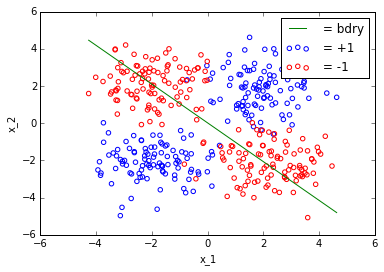

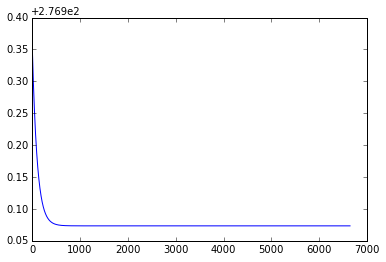

number of entries missclassified = 194
missclassification rate  = 0.485
--------------------


--------------------
data_nonsep

 
--- Minimization Summary --- 
x_min is = [ 0.00057119 -0.02374945 -0.02279427]
f_min is = 276.984708956
achieved tolerance = 9.99820852804e-05
numFunctionCalls = 6592
---------------------------- 
 
--- Classification Summary ---
w_full = [ 0.00057119 -0.02374945 -0.02279427]
w_full normalized = [ 0.01734909 -0.72135766 -0.69234539]
norm of w_full = 0.0329232593669
lambda = 10
number of entries missclassified = 194
missclassification rate  = 0.485
------------------



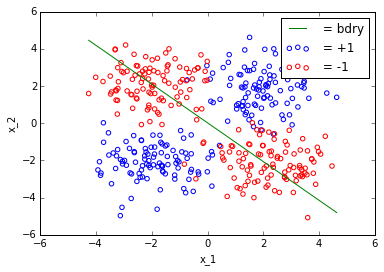

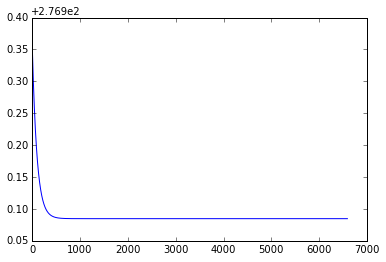

number of entries missclassified = 194
missclassification rate  = 0.485
--------------------


--------------------
data_nonsep

 
--- Minimization Summary --- 
x_min is = [ 0.00041589 -0.01747626 -0.0168489 ]
f_min is = 277.056624433
achieved tolerance = 9.99429605181e-05
numFunctionCalls = 6203
---------------------------- 
 
--- Classification Summary ---
w_full = [ 0.00041589 -0.01747626 -0.0168489 ]
w_full normalized = [ 0.01712968 -0.71980455 -0.69396541]
norm of w_full = 0.0242791701812
lambda = 100
number of entries missclassified = 194
missclassification rate  = 0.485
------------------



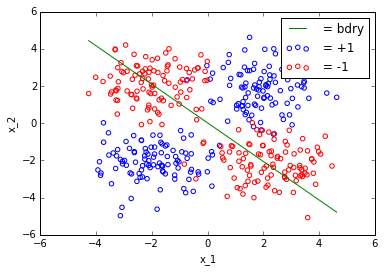

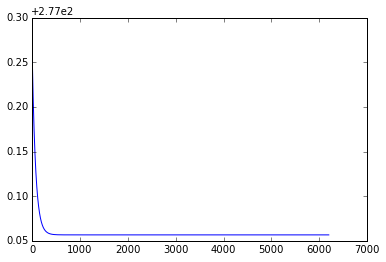

number of entries missclassified = 194
missclassification rate  = 0.485
--------------------


--------------------
data_nonsep

 
--- Minimization Summary --- 
x_min is = [ 0.00011114 -0.00480113 -0.00467587]
f_min is = 277.203024466
achieved tolerance = 9.99048362168e-05
numFunctionCalls = 4762
---------------------------- 
 
--- Classification Summary ---
w_full = [ 0.00011114 -0.00480113 -0.00467587]
w_full normalized = [ 0.01658069 -0.71629163 -0.69760403]
norm of w_full = 0.00670276070132
lambda = 1000
number of entries missclassified = 194
missclassification rate  = 0.485
------------------



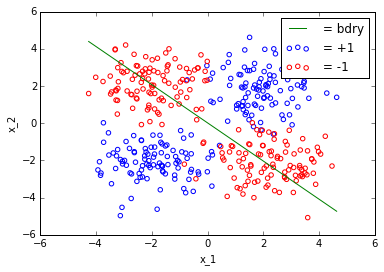

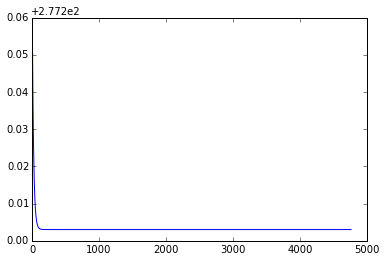

number of entries missclassified = 194
missclassification rate  = 0.485
--------------------


--------------------
data_nonsep

 
--- Minimization Summary --- 
x_min is = [  1.24870681e-05  -5.81742532e-04  -5.68674826e-04]
f_min is = 277.252092952
achieved tolerance = 9.99336298825e-05
numFunctionCalls = 2607
---------------------------- 
 
--- Classification Summary ---
w_full = [  1.24870681e-05  -5.81742532e-04  -5.68674826e-04]
w_full normalized = [ 0.01534761 -0.71500852 -0.69894726]
norm of w_full = 0.000813616222863
lambda = 10000
number of entries missclassified = 193
missclassification rate  = 0.4825
------------------



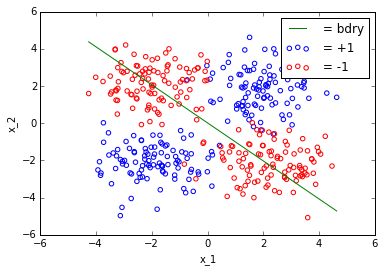

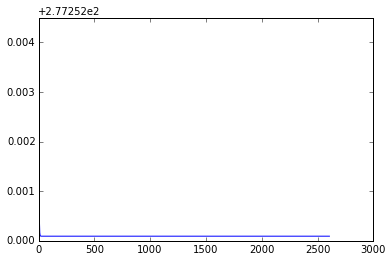

number of entries missclassified = 193
missclassification rate  = 0.4825
--------------------



In [36]:


def trainModel(fileName, lam, type="train", plotTest=False, plotValidate=False, plotIter=False,
              useGradientCriterion=False, stepSize=0.0001, maxFunctionCalls=10000, tol=1e-4):
    print ""
    print "--------------------"
    print fileName
    print ""
    
    lr = LogisticRegression.fromFile(fileName, type=type)
    w_guess = np.array([0,0,0])
    w_full = lr.computeDecisionBoundary(w_guess, lam, plot=True, printSummary=True, stepSize=stepSize, plotIter=plotIter,
                                       useGradientCriterion=useGradientCriterion, maxFunctionCalls=maxFunctionCalls,
                                       tol=tol)
    lr.classificationErrorRate(w_full, verbose=True)
    
    if plotTest:
        print ""
        print "--- " + fileName + " test set ---"
        lr_test = LogisticRegression.fromFile(fileName, type="test")
        lr_test.plotData(w_full=w_full)
        print " "
        print "--------------"
        lr_test.classificationErrorRate(w_full, verbose=True)
        print "--------------"
        print " "
    
    if plotValidate:
        print ""
        print "--- " + fileName + " validation set ---"
        lr_val = LogisticRegression.fromFile(fileName, type="validate")
        lr_val.plotData(w_full=w_full)
        print " "
        print "--------------"
        lr_val.classificationErrorRate(w_full, verbose=True)
        print "--------------"
        print " "
    print "--------------------"
    print ""
    
    return (w_full, lr)
        

        
filenames_all = ('data_stdev1', 'data_stdev2', 'data_stdev4', 'data_nonsep')
filenames = ('data_stdev1', 'data_stdev2', 'data_nonsep')
filenames = ('data_nonsep',)
lam = 0
lam_vals = [0,10,100,1000,10000]
# lam_vals = np.linspace(0,10,5)

if False:
    for fileName in filenames_all:
        trainModel(fileName, lam, plotTest=True, plotValidate=True)

if True:
    for fileName in filenames:
        for lam in lam_vals:
            trainModel(fileName, lam, plotIter=True, useGradientCriterion=True, stepSize=1e-5, maxFunctionCalls=50000)
        
        
        

        
# lam = 10000
# trainModel('data_nonsep', lam, plotTest=True, plotIter=True, tol=1e-20, stepSize=1e-5, maxFunctionCalls=50000,
#           useGradientCriterion=True)
        
# trainModel('data_stdev1', lam, plotTest=True, plotValidate=True, tol=1e-10, stepSize=0.01, maxFunctionCalls=50000)
# lam = 2
# (w_full, lr) = trainModel('data_stdev1', lam, plotIter=False, useGradientCriterion=True, stepSize=0.01,
#                           maxFunctionCalls=10000)
# lr.NLL_Reg(10.0*w_full, lam)
# lr.NLL_Reg_grad(w_full, lam)

In [31]:
filename = "hw2_resources/data/data_titanic_" + "train" + ".csv"
T = scipy.io.loadmat(filename)['data']
X = np.array(T[:,0:-1])
Y = np.array(T[:,-1])
print np.shape(X)
print np.shape(Y)

(200, 11)
(200,)


In [32]:
lr = LogisticRegression.fromTitanic()
print np.shape(lr.x)

(200, 11)


In [33]:
# code for exercises. Not relevant for homework

# def g(z):
#     return 1+np.exp(-z)

# def objective(theta, lam):
#     x1 = np.array([1,1])
#     x2 = np.array([1,0])
#     print 
    
#     return np.log(g(np.dot(x1, theta))) + np.log(g(-np.dot(x2,theta))) + lam/2.0*np.linalg.norm(theta)**2
    

# def computeTheta(lam, theta_0):
#     f = lambda theta: objective(theta, lam)
# #     scipy.optimize.minimize(f,theta_0)
#     gd = GradientDescent(f)
#     theta = gd.computeMin(theta_0, storeIterValues=True, maxFunctionCalls=10000, useGradientCriterion=True)[0]
#     gd.plotIterValues()
    
#     print "theta = " + str(theta)
#     print "theta scaled = " + str(theta/np.linalg.norm(theta))
#     print "theta_1/theta_2 = " + str(theta[0]/theta[1])
    
    
    
# lam = 2
# theta_0 = 2*np.array([-1,2])
# objective(theta_0,lam)
# computeTheta(lam, theta_0)